## EEIA 2023

### Quelques outils de statistique graphique avec Python

Dans ce notebook, nous utiliserons les librairies **Matplotlib** et **Seaborn** pour faire des affichages graphiques. Les deux librairies offrent des fonctionnalités similaires avec quelques nuances pour la seconde.



#### Import des données
Les données sont importés grâce à la librairie *pandas* sous la forme d'une *Dataframe*. Il s'agit d'une matrice de données avec les différentes en-têtes.
Les données pour cet exemple sont stockées dans un fichier *excel*. Nous allons charger une seule feuille du fichier de données. Par défaut, c'est la première feuille qui est lue.
Si vous voulez lire plusieurs feuilles vous pouvez les lister dans le paramètre *sheet_name*. Par contre attention, la variable chargée sera un dictionnaire. Un exemple est donné ci-dessous.
```python
d_data = pandas.read_excel('votreFicher.xls', sheet_name=['feuille_1', 'feuille_2', 'feuille_n'])
# Pour accéder à la donnée de la feuille 'feuille_1' il suffit d'utiliser comme clés du dictionnaire les noms des feuilles
df_data_feuille1 = d_data['feuille_1']
```

In [1]:
# Fichier de données
filename = "../data/datasetOK.xlsb.xlsx"

import pandas as pd

# Lecture du fichier de données avec le nom de la feuille à lire. Par défaut la 
df_data = pd.read_excel(filename, sheet_name='Nuage de points-boxplot')

# Afficher la liste des colonnes de données chargées
print(df_data.columns)

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


In [2]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [3]:
df_data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [4]:
# Afficher les 10 premières lignes des données chargées
df_data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


### Affichage d'un nuage de points
Dans cet exemple, nous afficherons la qualité du sommeil en fonction de l'âge. Nous avons choisi s'agit un nuage de points 2D.
Les packages *seaborn* et *matplotlib* permettent de le faire directement à partir de la donnée sous format *DataFrame*. 

<Axes: xlabel='Age', ylabel='Sleep Duration'>

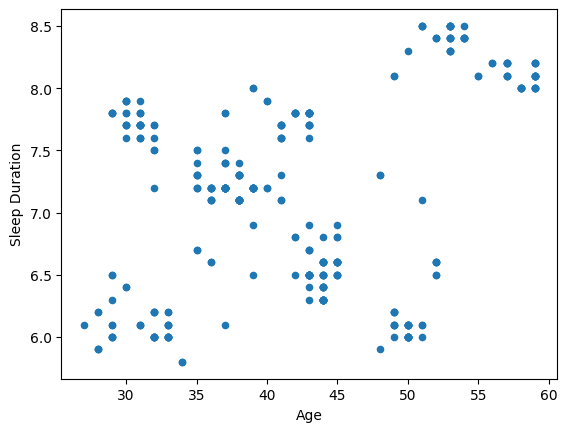

In [5]:
# Afficher la qualité du sommeil en fonction de l'âge
import matplotlib.pyplot as plt
df_data.plot(x="Age", y="Sleep Duration", kind='scatter')

Par défaut les limites des axes dépendent des données présentes dans les données. On n'a pas de données pour des personnes de moins de 27 ans ou pour des personnes dormant moins de 5.8h par nuit dans le jeu de données dont on dispose. Dans l'optique de créer un grahique favorisant une comparaison avec ces données pour une autre population, une solution est de modifier les limites des deux axes.

Text(0.5, 1.0, "Qualité du sommeil en fonction de l'âge")

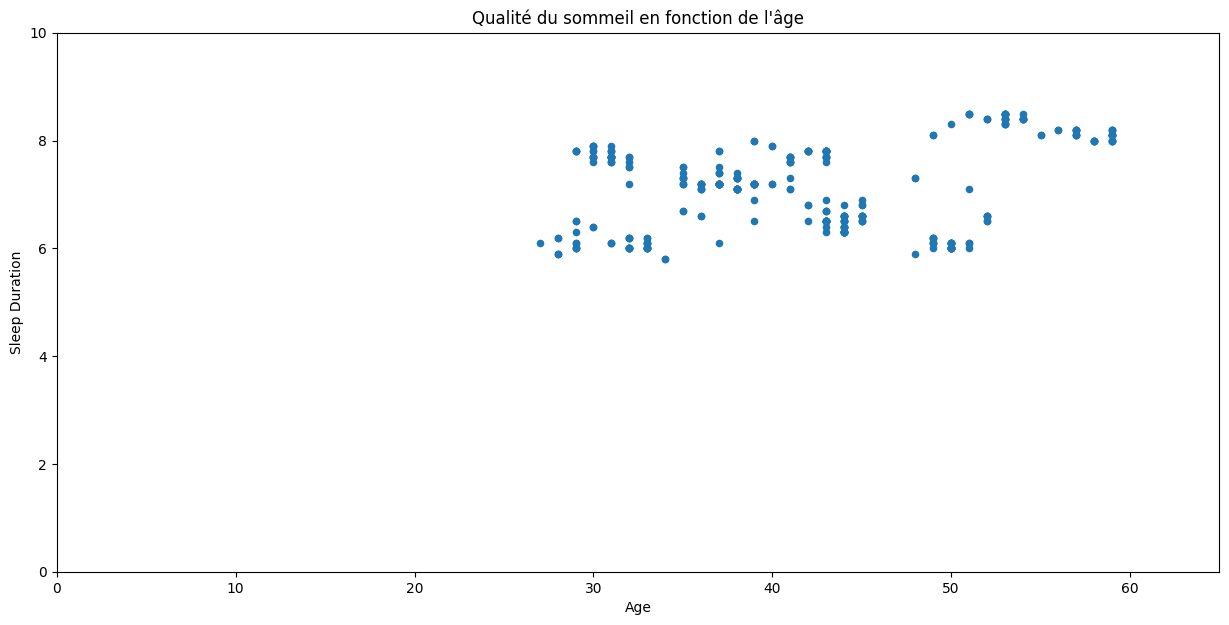

In [9]:
# Modifier les limites des axes
fig_scatter, axis_scatter = plt.subplots(1, 1, figsize=(15, 7))
df_data.plot(x="Age", y="Sleep Duration", kind='scatter', ax=axis_scatter)
axis_scatter.set_xlim(0, 65)
axis_scatter.set_ylim(0, 10)
axis_scatter.set_title("Qualité du sommeil en fonction de l'âge")

### Boîtes à moustache
Cette représentation graphique permet une analyse de la distribution des variables. 

<Axes: xlabel='Occupation', ylabel='Heart Rate'>

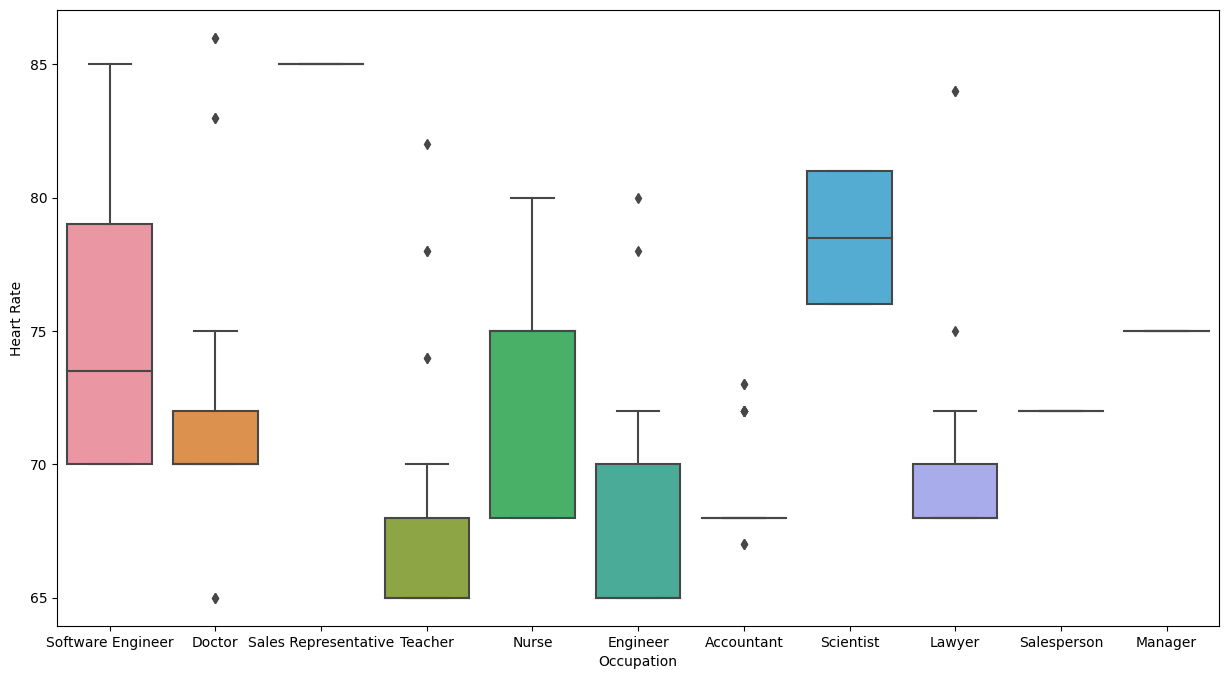

In [6]:
import seaborn as sns
fig_boxplot, axis_boxplot = plt.subplots(1, 1, figsize=(15, 8))
sns.boxplot(data=df_data, x="Occupation", y="Heart Rate", ax=axis_boxplot)

### Histogrammes
*seaborn* offre la possibilité d'afficher l'histogramme en pourcentage sans avoir à faire d'opérations de normalisation. Il suffit pour ça d'utiliser le paramètre **stat** de la fonction *histplot*.
Les détails sur les paramètres de la fonction sont disponibles sur la [page de la fonction](https://seaborn.pydata.org/generated/seaborn.histplot.html).
Pour afficher en lignes ou en colonnes l'histogramme, il suffit d'utiliser soit le paramètre *x* soir le paramètre *y*.

Text(0.5, 0, 'Pourcentage (%)')

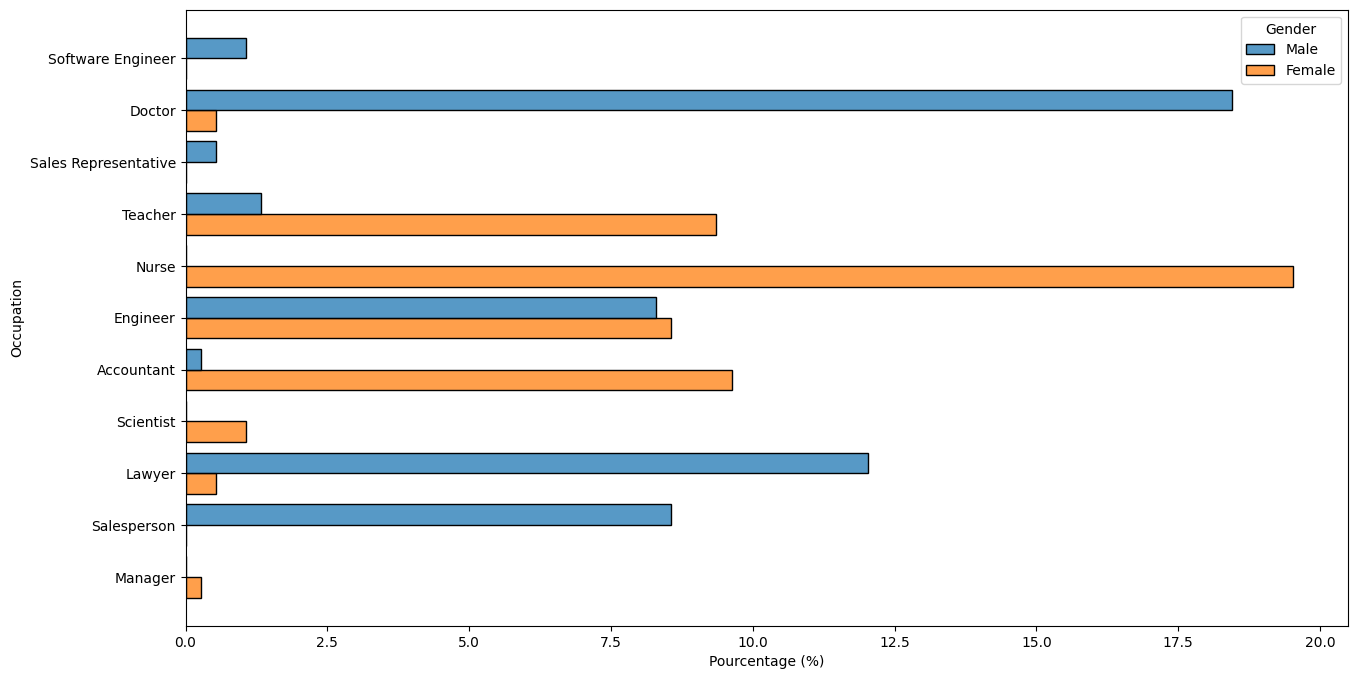

In [7]:
fig_hist, axis_hist = plt.subplots(1, 1, figsize=(15, 8))
sns.histplot(df_data, y='Occupation', hue="Gender", stat="percent", multiple="dodge", shrink=.8, ax=axis_hist)
axis_hist.set_xlabel("Pourcentage (%)")